<a href="https://colab.research.google.com/github/Achuna/Climate-Data-UMBC-Summer-Research/blob/master/Notebooks/Bayesian_Inferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Metadata

**DESCRIPTION2**

The data represents the **variance** of the given column

Variance is a measure of how spread out a data set is (Some of it is negative but we can disregard this format)

Time lag is a **shift** in what data points we are looking at.

Each time step is a month (~40 years)

---


**MSL (Mean Sea Level)**

msl 01- Antarctica

msl 02  - North Atlantic oscillation

msl 03 - Southeast Pacific

msl 04 - North Pacific

msl 06 -  Southwest Pacific

msl 07  -  Siberia


---



 **Si10 (Wind Speed 10 meters)**


si10 00 -  Antarctic circumpolar current

si10 01 -  South Pacific

si10 04  -  Tropical eastern Pacific

si10 05  - Tropical central Pacific

si10 06  -  North Atlantic subtropical gyre

si10 07  -  North Pacific subtropical gyre



---

**SST (Sea Surface Temperature)**

sst 00  -  Equatorial central Pacific (ENSO)

sst 03  -  Equatorial eastern Pacific (ENSO)

sst 04  -  Western coast of North America

sst 05  -  North Pacific (PDO)

sst 06  -  Kuroshio extension

sst 07  -  Western coast of South America



---

**T2M (Temperature at 2 meters)**

t2m 02  -  Antarctica

t2m 03   -  Arctic

t2m 04   -  North America

t2m 06   -  Siberia

t2m 07   -  Europe

t2m 08   -  Greenland

# Data Preperation

## Getting Files Online

In [0]:
!pip install pgmpy #install the pgmpy library

In [0]:
import pandas as pd
import numpy as np
from  urllib.request import urlopen  # the lib that handles the url stuff

#Retrieves climate data from url and converts it into an array of floats
def retrieveData(url):
  array = []
  data = urllib.request.urlopen(url) # it's a file like object and works just like a file
  for line in data: # files are iterable
      line = str(line)
      newLine = line.replace("'", "").replace("b", "").replace("n", "").replace("\\", "") #delete a few unneeded symbols
      array.append(float(newLine))  
  return array

#Put values in an array
msl = retrieveData("https://raw.githubusercontent.com/Achuna/DataPractice/master/eof_ts_msl-01")
si10 = retrieveData("https://raw.githubusercontent.com/Achuna/DataPractice/master/eof_ts_si10-20")
sst = retrieveData("https://raw.githubusercontent.com/Achuna/DataPractice/master/eof_ts_sst-13")
t2m = retrieveData("https://raw.githubusercontent.com/Achuna/DataPractice/master/eof_ts_t2m-07")


myColumns = "msl-01 si10-20 sst-13 t2m-07".split()

allData = np.column_stack((msl, si10, sst, t2m))

df = pd.DataFrame(allData, columns=myColumns)

df

,msl-01,si10-20,sst-13,t2m-07
0,-0.499200,0.022619,0.109273,0.774216
1,-0.359078,2.705268,-0.264073,-0.176478
2,-1.042020,-0.686304,-0.287171,-1.190285
3,-0.844485,-0.355621,-0.656911,0.628816
4,-0.972610,-0.048683,-0.746113,-1.752389
5,-1.497780,0.047612,-0.522640,-0.469959
6,-2.333303,0.501210,-0.437077,-0.310096
7,-0.509094,-0.495057,-0.233569,-0.863965
8,-0.641116,-0.021234,-0.123470,-1.364164
9,-0.157565,0.268508,0.293815,-0.223483


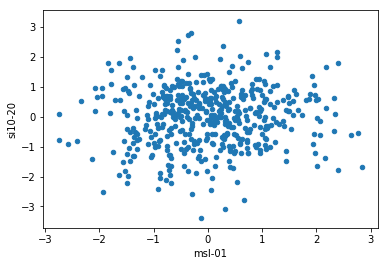

In [0]:
df.plot(kind="scatter", x='msl-01', y = 'si10-20')

## Getting Files Locally

In [0]:
import os
from google.colab import files
import pandas as pd
import numpy as np

files.upload() #Upload Files locally from computer

df = pd.DataFrame([]) #Empty dataframe


for file in os.listdir('/content'):
  try:
    f=open(file)
    columnName = file[file.rfind('_')+1 : len(file)] #get column name from file name
    a = f.read().split("\n")
    #convert strings to floats
    y = np.array((float, a)) #index 0 = data type, index 1 = data
    array = y[1]
    # Using DataFrame.insert() to add a column 
    df.insert(0, columnName, array) #insert new column at the beginning 
    f.close()
  except:
    print("")
    
df #print dataframe

Saving eof_ts_msl-01 to eof_ts_msl-01
Saving eof_ts_si10-20 to eof_ts_si10-20
Saving eof_ts_sst-13 to eof_ts_sst-13
Saving eof_ts_t2m-07 to eof_ts_t2m-07





,si10-20,sst-13,t2m-07,msl-01
0,0.02261937,0.1092731,0.7742165,-0.4992003
1,2.705268,-0.2640729,-0.1764782,-0.3590781
2,-0.6863038,-0.2871706,-1.190285,-1.04202
3,-0.3556211,-0.656911,0.6288159,-0.8444854
4,-0.04868329,-0.7461126,-1.752389,-0.9726096
5,0.04761203,-0.5226395,-0.4699586,-1.49778
6,0.5012097,-0.437077,-0.3100962,-2.333303
7,-0.4950566,-0.2335693,-0.863965,-0.5090938
8,-0.02123359,-0.1234696,-1.364164,-0.6411163
9,0.2685077,0.293815,-0.2234831,-0.1575649


# Learning from Data

## Regression Model

In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#seperating data and target data
X_df = df.iloc[: , [0,1,2]] #data - independent values
y = df['t2m-07'] #target data - 'dependent (output) values'

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2) 

print (X_train.shape, y_train.shape) #print out the shape of each dataset
print (X_test.shape, y_test.shape) 


(384, 3) (384,)
(97, 3) (97,)


In [0]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train) #fitting the data with the target data (USING TRAINING DATA)

predictions = lm.predict(X_test) #Use model to predict the target data of the test datase

Model Accuracy Score (%): 0.7489546661708646
Mean Squared Error/Deviation:  1.2822898534007976


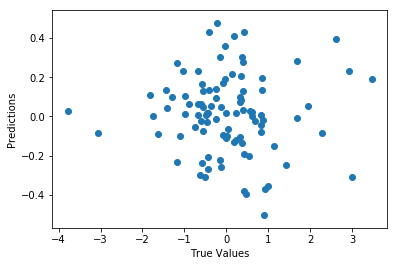

In [0]:
plt.scatter(y_test, predictions)

plt.xlabel("True Values")
plt.ylabel("Predictions")

print ("Model Accuracy Score (%):", model.score(X_test, y_test) * 100)
print("Mean Squared Error/Deviation: ", np.mean((predictions - y_test)**2)) #Average deviation from true values


plt.show()

**Conclusion**

Using the linear regression model does not help us successfully make accurate prediections on the new climate data provided. The model accuracy turned out to be below 1%


## Bayesian Model

**Challenges Faced**


1) In order to make bayesian inferences, I need to create a network structure where each node holds a conditional probabilty distribution (CPD)

2) Using the bayesian model requires me to know the causal relationships between the variables to create a network and make predictions

---

Do I have to end up converting the climate data into some sort of probabilty distribution/table in order to make causal inferences? The bayesian model initially requires a network structure where each node is a CPD to make inferences


**Research Findings**


"To learn the structure
and the parameters for the Bayesian networks from a set
of data, we should search the space(s) of all possible
graph representations, and find out which structure is
most likely to produce our data. If we have a scoring
function (or likelihood function) which can determine
the structure and parameter likelihood from the data,
then the problem is to find the highest score (maximum likelihood) structure among all the possible representations.""


Granger causality vs. dynamic Bayesian network inference:
a comparative study

(Cunlu Zou and Jianfeng Feng)

---

A bayesian network is a direct acyclic graph showing the direct cause and effect between nodes used to make inference about new data points

**Approach**

Useful Articles:

[Learning Bayesian Network from Data](http://robotics.stanford.edu/~koller/NIPStut01/tut6.pdf)

[Learning Bayesian Network Model Structure from Data](https://www.cs.cmu.edu/~dmarg/Papers/PhD-Thesis-Margaritis.pdf) 

In order to make inteferences on new datasets, I must:

1) *** Create a bayesian structure using a score-based (bayesian) approach. Essentially testing the structure of all possible DAGs. (Running Causality Tests)

2)  **Store the conditional probabilties in each node

3)  *Make inference queries on new data points. 

In [0]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

